In [8]:
# Exemplo 1 – Carregando e codificando os dados
from sklearn import preprocessing as pe
import pandas as pa

data = [
    ['Ensolarado', 28, 'Alta', 'Fraco', 'Não'],
    ['Ensolarado', 31, 'Alta', 'Forte', 'Não'],
    ['Nublado', 30, 'Alta', 'Fraco', 'Sim'],
    ['Chuvoso', 23, 'Alta', 'Fraco', 'Sim'],
    ['Chuvoso', 15, 'Normal', 'Fraco', 'Sim'],
    ['Chuvoso', 15, 'Normal', 'Forte', 'Não'],
    ['Nublado', 11, 'Normal', 'Forte', 'Sim'],
    ['Ensolarado', 21, 'Alta', 'Fraco', 'Não'],
    ['Ensolarado', 12, 'Normal', 'Fraco', 'Sim']
]

df = pa.DataFrame(data, columns=['Clima', 'Temperatura', 'Umidade', 'Vento', 'Jogar'])

def Encode(lista):
    enc = pe.LabelEncoder()
    enc.fit(lista)
    nova_lista = enc.transform(lista)
    return enc, nova_lista

peClima, df['Clima'] = Encode(df['Clima'])
peUmidade, df['Umidade'] = Encode(df['Umidade'])
peVento, df['Vento'] = Encode(df['Vento'])
peJogar, df['Jogar'] = Encode(df['Jogar'])

display(df)


,Clima,Temperatura,Umidade,Vento,Jogar
0,1,28,0,1,0
1,1,31,0,0,0
2,2,30,0,1,1
3,0,23,0,1,1
4,0,15,1,1,1
5,0,15,1,0,0
6,2,11,1,0,1
7,1,21,0,1,0
8,1,12,1,1,1


In [9]:
# Exemplo 2 – Seleção de Atributos e separação entre
# previsores/alvo
import numpy as np
X = np.array(df[['Clima', 'Temperatura']])
y = np.array(df['Jogar'])
display(X)
display(y)

array([[ 1, 28],
       [ 1, 31],
       [ 2, 30],
       [ 0, 23],
       [ 0, 15],
       [ 0, 15],
       [ 2, 11],
       [ 1, 21],
       [ 1, 12]], dtype=int64)

array([0, 0, 1, 1, 1, 0, 1, 0, 1])

In [10]:
# Exemplo 3 – Treinamento de um modelo kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

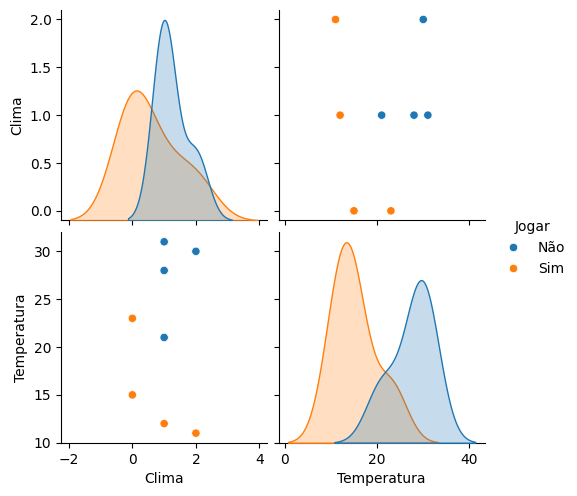

In [11]:
# Exemplo 4 – Previsão dos rótulos
import seaborn as sb
y_prevs = knn.predict(X)
df_prev = pa.DataFrame(X, columns=['Clima', 'Temperatura'])
df_prev['Jogar'] = y_prevs
df_prev['Jogar'] = peJogar.inverse_transform(df_prev['Jogar'])
sb.pairplot(df_prev, hue='Jogar')


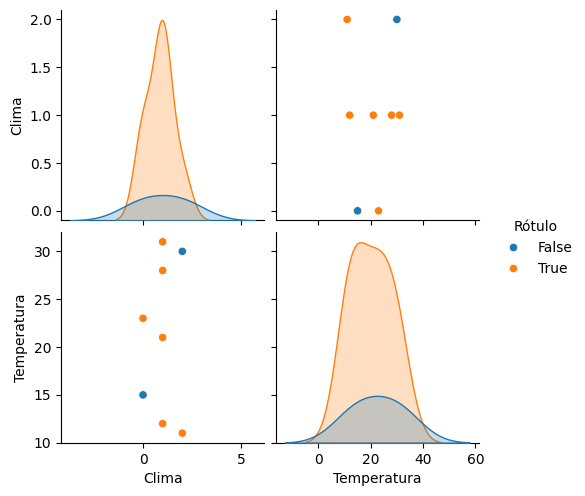

In [12]:
# Exemplo 5 – Comparação entre os rótulos previstos e originais
yy = y_prevs == y
df_prev_check = pa.DataFrame(X, columns=['Clima', 'Temperatura'])
df_prev_check['Rótulo'] = yy
sb.pairplot(df_prev_check, hue='Rótulo')


In [13]:
# Exemplo 6 – Métrica de acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_prevs)
print('Acurácia: {0:0.2f}%'.format(acc * 100))


Acurácia: 77.78%


In [14]:
# Exemplo 7 – Matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_prevs)
df_cm = pa.DataFrame(cm, index=['Não - Real', 'Sim - Real'],
                     columns=['Não – Prev.', 'Sim - Prev.'])
print(df_cm)


            Não – Prev.  Sim - Prev.
Não - Real            3            1
Sim - Real            1            4


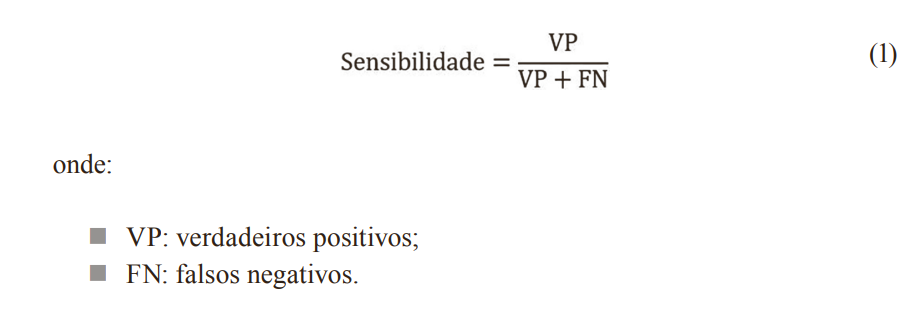

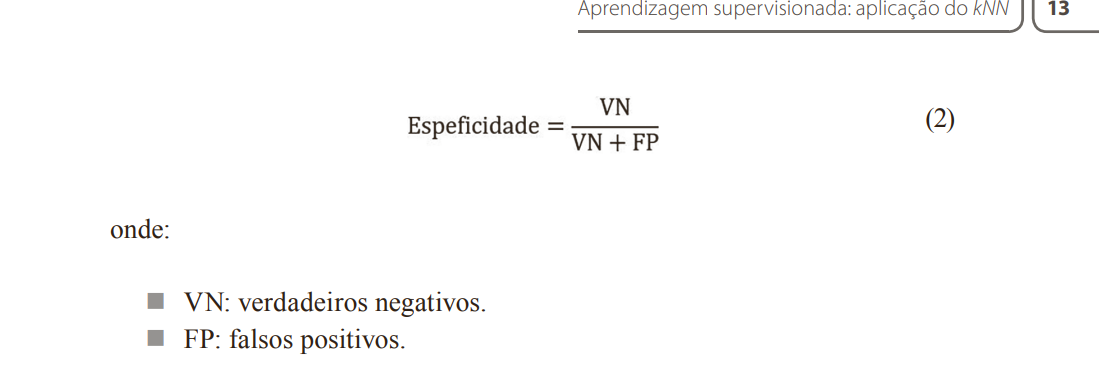

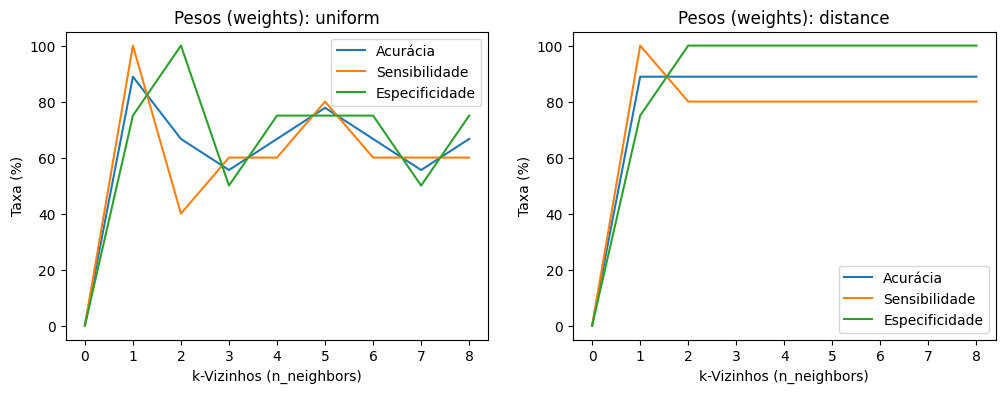

In [15]:
# Exemplo 8 – Varredura de parâmetros
neighbors = range(1, 9, 1)
weights = {'uniform': [], 'distance': []}

for w in weights:
    accs = [0]
    sens = [0]
    esps = [0]
    for n in neighbors:
        model = KNeighborsClassifier(n_neighbors=n, weights=w)
        model.fit(X, y)
        y2 = model.predict(X)

        VN, FP, FN, VP = confusion_matrix(y, y2).ravel()
        acc = accuracy_score(y, y2) * 100
        sen = VP / (VP + FN) * 100
        esp = VN / (VN + FP) * 100
        accs.append(acc)
        sens.append(sen)
        esps.append(esp)
    
    weights[w] = [accs, sens, esps]

import matplotlib.pyplot as pyp
fig, axs = pyp.subplots(1, 2, figsize=(12, 4))

for i, d in enumerate(weights.items()):
    for dd in d[1]:
        axs[i].plot(dd)

    axs[i].set_title('Pesos (weights): {}'.format(d[0]))
    axs[i].set_xlabel('k-Vizinhos (n_neighbors)')
    axs[i].set_ylabel('Taxa (%)')
    axs[i].legend(['Acurácia', 'Sensibilidade', 'Especificidade'])


O parâmetro do método KNeighborsClassifier que pode ajudar a reduzir o impacto de diferenças de amplitude entre atributos previsores é o parâmetro weights. Através desse parâmetro, você pode especificar como os pesos são atribuídos às amostras vizinhas durante a previsão.

Existem duas opções principais para o parâmetro weights:

'uniform': Todos os pontos no espaço têm o mesmo peso. Isso significa que cada vizinho contribui igualmente para a decisão.

'distance': Os pesos são dados com base na inversa da distância entre os pontos. Pontos mais próximos têm um peso maior do que pontos mais distantes.

Ao usar 'distance', o modelo dará mais importância aos vizinhos mais próximos, independentemente da escala dos atributos. Isso pode ajudar a mitigar o impacto de diferenças de amplitude entre atributos, pois as distâncias serão normalizadas pela escala dos atributos.

Aqui está um exemplo de como você pode usar weights='distance' ao criar um objeto KNeighborsClassifier:



In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Supondo que X_train e y_train sejam seus dados de treinamento
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)


NameError: name 'X_train' is not defined

Lembre-se de que a escolha adequada de parâmetros pode depender da natureza específica do seu conjunto de dados, e é sempre uma boa prática realizar validação cruzada ou ajuste fino para encontrar os melhores parâmetros para o seu problema específico.